In [ ]:
CLASSIFICATION
used to identify the category of new observations on the basis of training data
a program learns from the given dataset and then classifies new observation into a number of classes or groups
_____________________________________________________________________________________________________________________
1. BINARY CLASSIFIER (only two possible outcomes)
2. MULTI-CLASS CLASSIFIER (more than two outcomes)

In [ ]:
Logistic Regression
used for predicting the categorical dependent variable using a given set of independennt variables
the outcome must be categorical or discrete 
_____________________________________________________________________________________________________________________

1. Binomial
    two possible types of dependent variable 
    pass/fail
2. Multinomial
    3 or more possible unordered types of dependent variables
3. Ordinal
    3 or more possible ordered types of dependent variables
_____________________________________________________________________________________________________________________

Sigmoid Algorithm
s-shaped curve is made on the dataset to derive predictions
a threshold value is defined = 0.5
y=1/1+e^(-x)
x = m1x1 + m2x2 + b

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r"D:\Downloads\archive\Social_Network_Ads.csv")
dataset.drop(columns=["EstimatedSalary"],inplace=True)
dataset.head()

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0


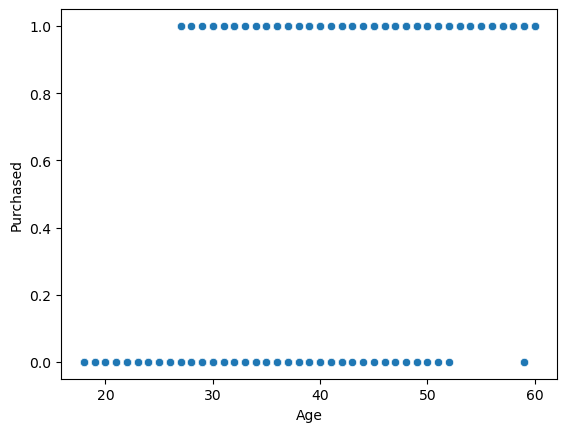

In [4]:
sns.scatterplot(x="Age",y="Purchased",data=dataset)
plt.show()

In [5]:
x=dataset[["Age"]]
y=dataset["Purchased"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [6]:
lr.score(x_test,y_test)

0.9125

In [7]:
lr.predict([[40]])

C:\Users\MANYA SHARMA\anaconda3\envs\datascience_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

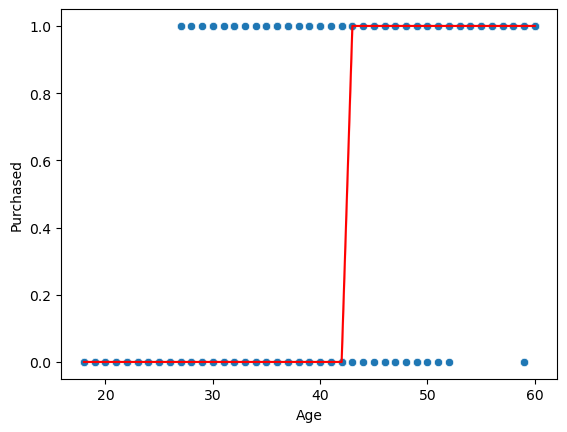

In [8]:
sns.scatterplot(x="Age",y="Purchased",data=dataset)
sns.lineplot(x="Age",y=lr.predict(x),data=dataset, color="red")
plt.show()

In [9]:
dataset=pd.read_csv(r"D:\Downloads\archive\placement-dataset.csv")
dataset.head()

,cgpa,score,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


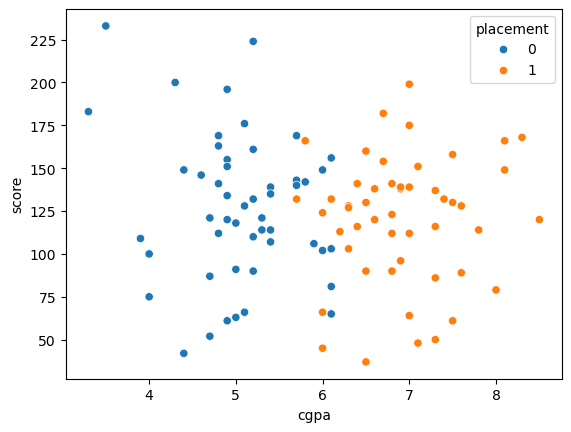

In [10]:
sns.scatterplot(x="cgpa",y="score",data=dataset,hue="placement")
plt.show()

In [11]:
x=dataset.iloc[:,:-1]
y=dataset["placement"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
lr.score(x_test,y_test)

0.85

C:\Users\MANYA SHARMA\anaconda3\envs\datascience_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


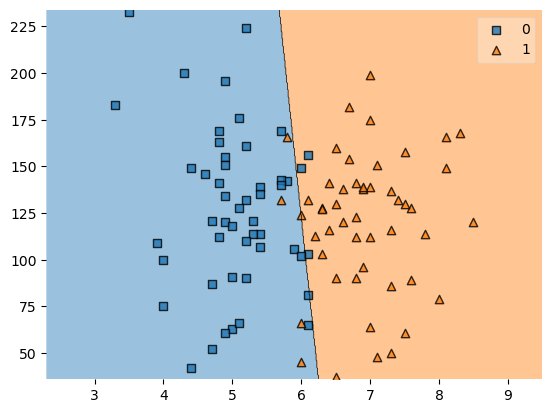

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.ravel(),clf=lr)
plt.show()

In [ ]:
WHAT TO DO IF DATA IS NOT LINEARLY SEPARABLE?

In [14]:
dataset=pd.read_csv(r"D:\Downloads\archive\nonlinear_data_circles.csv")
dataset.head()

,x1,x2,label
0,0.160594,0.482602,1
1,1.198440,-0.542104,0
2,-0.618907,0.728517,0
3,1.070839,-0.340617,0
4,0.843196,-0.502865,0


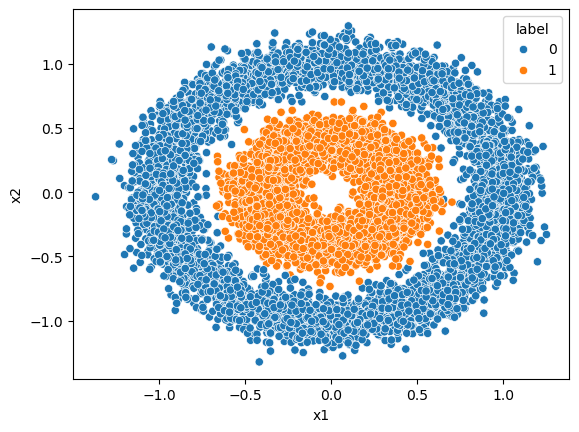

In [16]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="label")
plt.show()

In [17]:
x=dataset.iloc[:,:-1]
y=dataset["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
lr.score(x_test,y_test)

0.585

C:\Users\MANYA SHARMA\anaconda3\envs\datascience_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


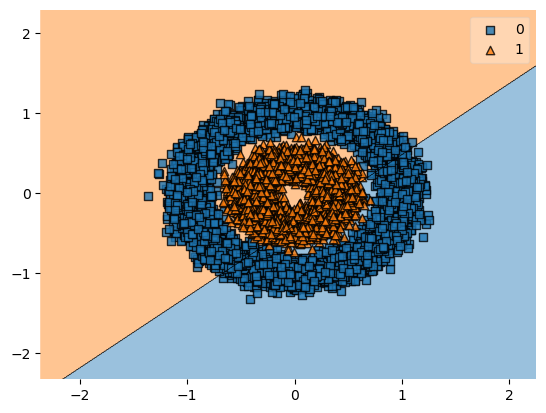

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.ravel(),clf=lr)
plt.show()

In [26]:
#Using polynomial features for proper classification
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
pf.fit(x)
x=pd.DataFrame(pf.transform(x))

In [27]:
x=dataset.iloc[:,:-1]
y=dataset["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
lr.score(x_test,y_test)

0.585

In [ ]:
MULTICLASS CLASSIFICATION
we use the OVR method
one vs rest method
~converts data to one hot encoding

In [30]:
dataset=pd.read_csv(r"D:\Downloads\archive\iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
dataset["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

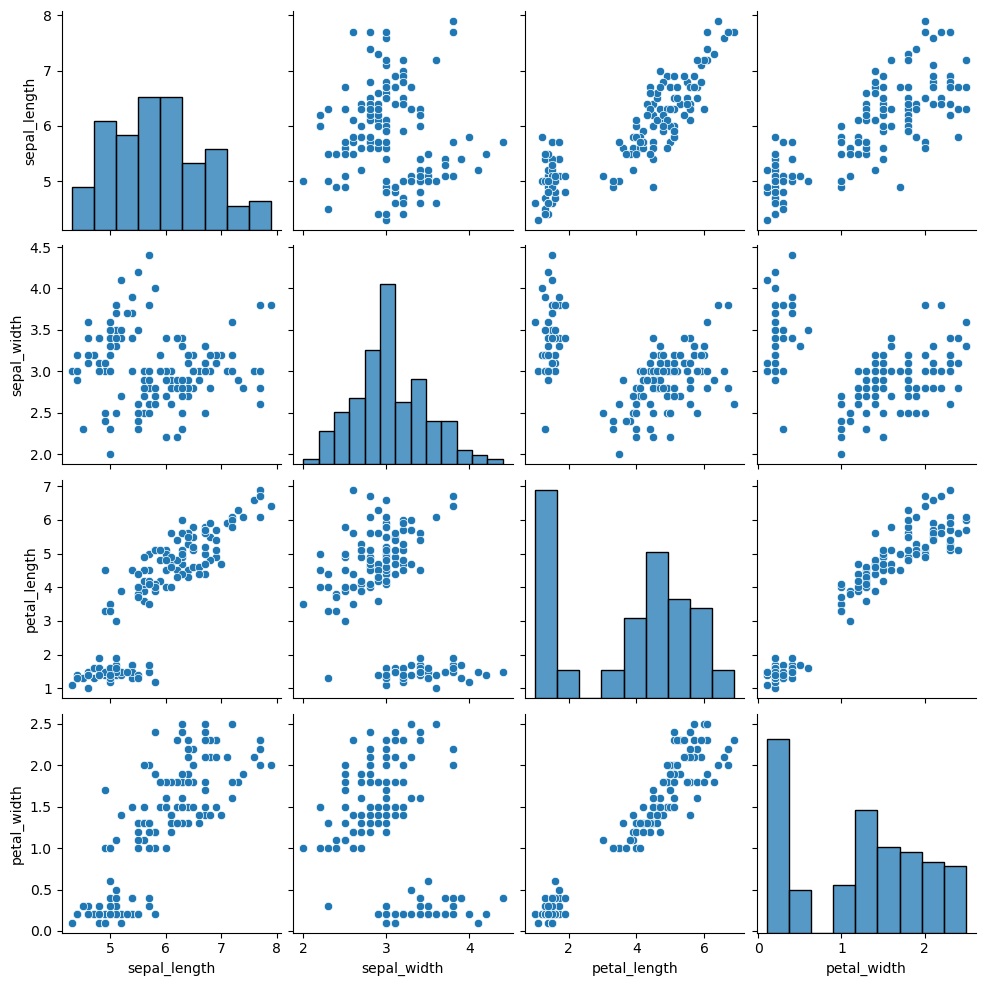

In [33]:
sns.pairplot(data=dataset)
plt.show()

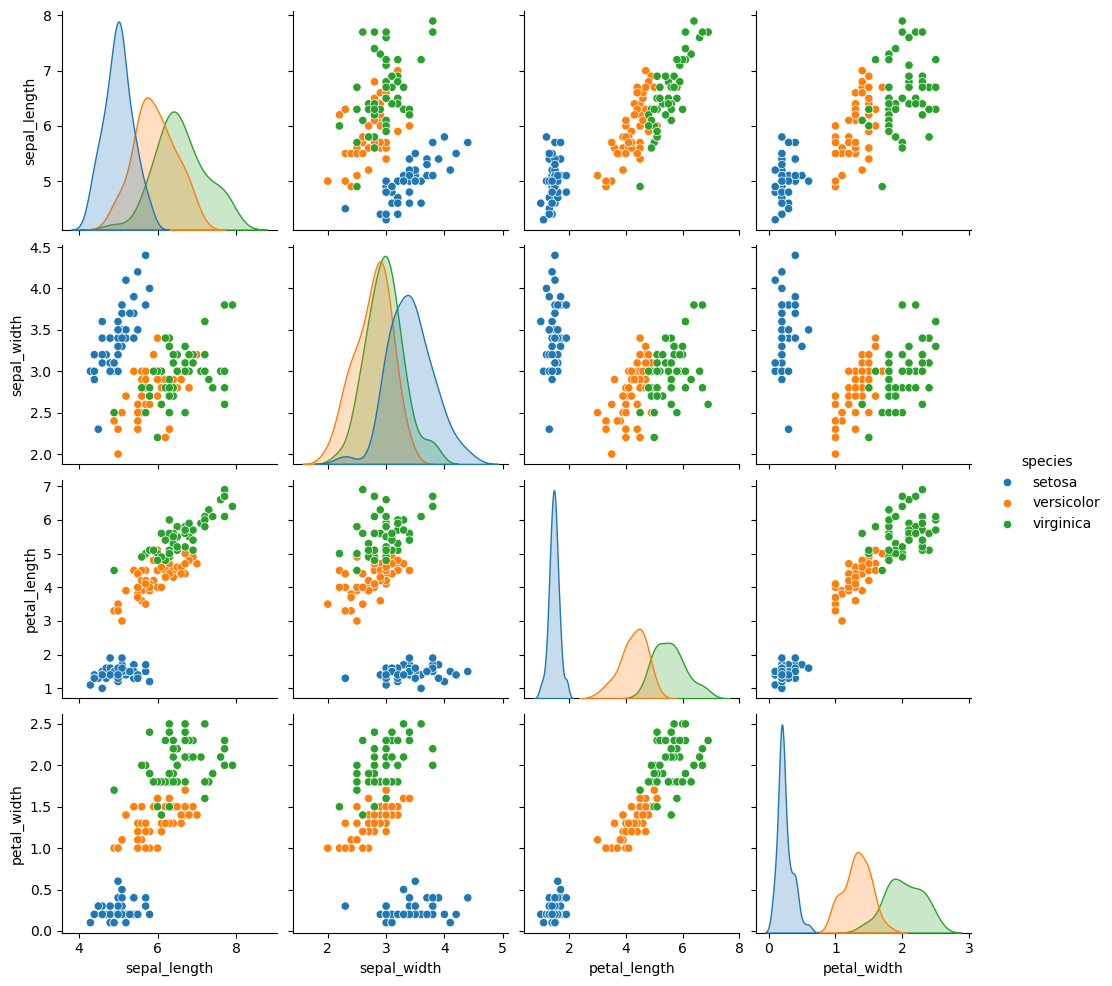

In [34]:
sns.pairplot(data=dataset,hue="species")
plt.show()

In [35]:
x=dataset.iloc[:,:-1]
y=dataset["species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)

C:\Users\MANYA SHARMA\anaconda3\envs\datascience_env\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [36]:
lr.score(x_test,y_test)

0.9666666666666667

In [37]:
#multinomial
lr1=LogisticRegression(multi_class="multinomial")
lr1.fit(x_train,y_train)

C:\Users\MANYA SHARMA\anaconda3\envs\datascience_env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [38]:
lr.score(x_test,y_test)

0.9666666666666667